In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import color
from skimage.exposure import rescale_intensity

# extending Pandas view limits
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
pillpic = imageio.imread('backlv.png')

pillpic_gray = rescale_intensity(color.rgb2gray(pillpic))
pillpic_gray2 = rescale_intensity(1 - color.rgb2gray(pillpic))

pillpic_gray

array([[0.09967608, 0.09967608, 0.11536235, ..., 0.07950275, 0.08342431,
        0.09518902],
       [0.11144078, 0.11144078, 0.11536235, ..., 0.09126745, 0.09126745,
        0.09911059],
       [0.11536235, 0.11928392, 0.11144078, ..., 0.09126745, 0.09126745,
        0.09518902],
       ...,
       [0.08262078, 0.08654235, 0.09438549, ..., 0.07392941, 0.07813373,
        0.07392941],
       [0.08262078, 0.09046392, 0.09046392, ..., 0.08205529, 0.08205529,
        0.07392941],
       [0.07869922, 0.09046392, 0.09046392, ..., 0.07813373, 0.07029059,
        0.07029059]])

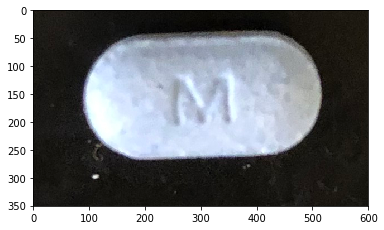

In [12]:
plt.imshow(pillpic);

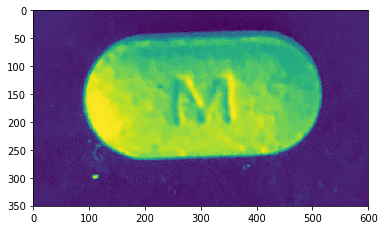

In [13]:
# THIS ONE IS ACTUALLY GRAY - NOT AS SHOWN!!!
plt.imshow(pillpic_gray);

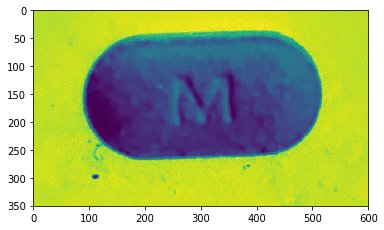

In [14]:
# THIS ONE IS ALSO GRAY - NOT AS SHOWN!!!
plt.imshow(pillpic_gray2);

In [15]:
# Saving images - GRAY IMAGE - NOT ENOUGH CONTRAST TO EXTRACT TEXT!!!
# imageio.imwrite('./backlv4.png', pillpic_gray2)

### Using Scikit-image

Will try to create same contrast as show in images above (that are actually gray)

RGB to HSV:

RGB to HSV (Hue, Saturation, Value) conversion 1 can be used to facilitate segmentation processes.

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.

In [16]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(pillpic)

hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

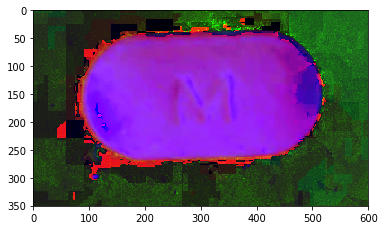

In [17]:
plt.imshow(hsv_img)

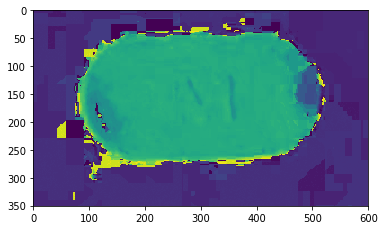

In [18]:
plt.imshow(hue_img);

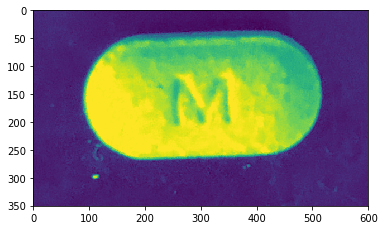

In [19]:
plt.imshow(value_img);

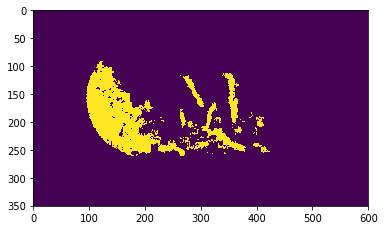

In [21]:
value_threshold = .99
binary_img = value_img > value_threshold
plt.imshow(binary_img);

In [22]:
# Saving "heu" and "value" images
# imageio.imwrite('./pill_hue.png', hue_img)
#imageio.imwrite('./pill_value.png', value_img)

#### Thresholding

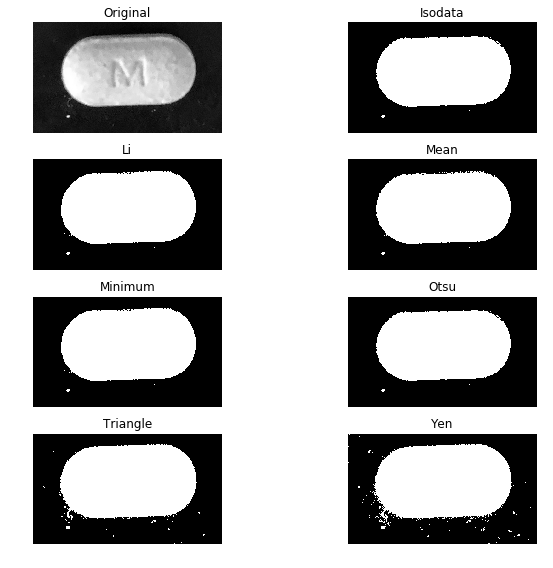

In [24]:
from skimage.filters import try_all_threshold

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(pillpic_gray, figsize=(10, 8), verbose=False)
plt.show()

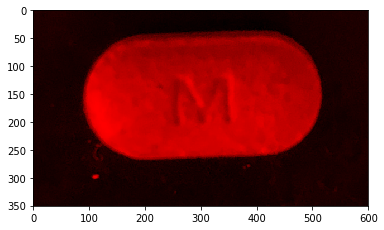

In [25]:
image = color.gray2rgb(pillpic)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

plt.imshow(red_multiplier * image)
# plt.imshow(yellow_multiplier * image)

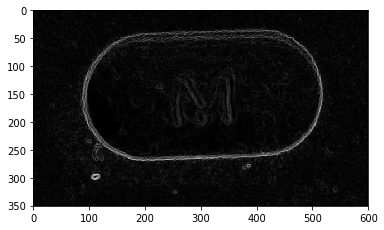

In [26]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_sobel = sobel(pillpic_gray)
plt.imshow(edge_sobel, cmap=plt.cm.gray)

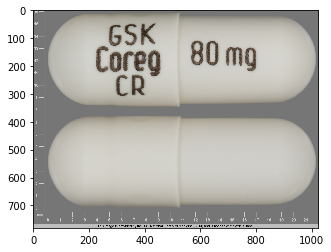

In [27]:
# image from pillbox
image2 = imageio.imread('pillbox_images/00007-3373-13_AC13566A.jpg')
plt.imshow(image2)

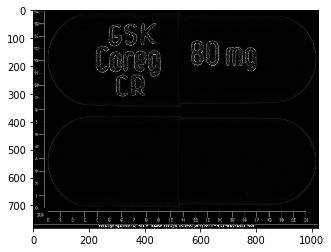

In [28]:
image2_gray = rescale_intensity(color.rgb2gray(image2))
image2_scharr = scharr(image2_gray)
plt.imshow(image2_scharr, cmap=plt.cm.gray)

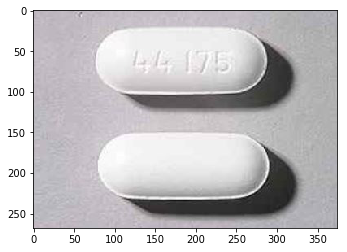

In [29]:
image5 = imageio.imread('44175pill.jpg')
plt.imshow(image5)

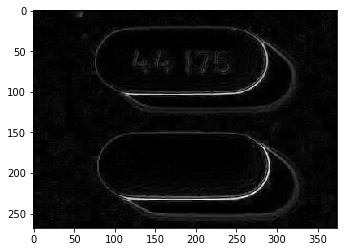

In [30]:
image5_gray = rescale_intensity(color.rgb2gray(image5))
image5_scharr = scharr(image5_gray)
plt.imshow(image5_scharr, cmap=plt.cm.gray)

### Using OpenCV

Grayscalling Image & Detecting Edges

In [31]:
import cv2
import numpy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

img = cv2.imread('backlv.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
edges = cv2.Canny(gray, 70,70)

cv2_imshow(gray) 
cv2_imshow(edges)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Detecting edges using `pillpic_grayscale` from first iteration
edges2 = cv2.Canny(gray, 50,50)

cv2_imshow(edges2)

In [ ]:
# imageio.imwrite('./pill_edges.png', edges2)

Grayscalling Image & Detecting Edges

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

img = cv2.imread('backlv.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
edges = cv2.Canny(gray, 70,70)

cv2_imshow(gray) 
cv2_imshow(edges)

In [ ]:
# Detecting edges using `pillpic_grayscale` from first iteration
edges2 = cv2.Canny(gray, 50,50)

cv2_imshow(edges2)

In [ ]:
# imageio.imwrite('./pill_edges.png', edges2)